## Assignment 3
### Question 3: Implement linear SVM with iris dataset. Consider two classes of Iris dataset which consists of three classes by removing one of the classes.

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Considering Only setosa and versicolor

In [7]:
df.drop(df[df['species']=='virginica'].index,axis=0,inplace=True)

In [8]:
df['species'].unique()

array(['setosa', 'versicolor'], dtype=object)

In [9]:
df['species']=pd.get_dummies(df['species'],drop_first=True)

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Here 0 - setosa and 1 - versicolor

In [11]:
from sklearn.svm import SVC

In [12]:
regressor = SVC()

In [13]:
from sklearn.model_selection import train_test_split as tts

In [14]:
X = df.iloc[:,:-1].values
y = df['species'].values

In [15]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler as SC 
sc_x = SC()

In [17]:
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [18]:
# Fitting the model
regressor.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [19]:
y_pred = regressor.predict(X_test)

In [20]:
for i in range(len(y_pred)):
    print("Original Value: ",y_test[i]," Predicted Value: ",y_pred[i])

Original Value:  0  Predicted Value:  0
Original Value:  1  Predicted Value:  1
Original Value:  0  Predicted Value:  0
Original Value:  1  Predicted Value:  1
Original Value:  1  Predicted Value:  1
Original Value:  1  Predicted Value:  1
Original Value:  0  Predicted Value:  0
Original Value:  1  Predicted Value:  1
Original Value:  1  Predicted Value:  1
Original Value:  1  Predicted Value:  1
Original Value:  1  Predicted Value:  1
Original Value:  1  Predicted Value:  1
Original Value:  1  Predicted Value:  1
Original Value:  0  Predicted Value:  0
Original Value:  0  Predicted Value:  0
Original Value:  0  Predicted Value:  0
Original Value:  0  Predicted Value:  0
Original Value:  0  Predicted Value:  0
Original Value:  0  Predicted Value:  0
Original Value:  0  Predicted Value:  0


In [21]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix as CM
cm=CM(y_test,y_pred)
cm

array([[10,  0],
       [ 0, 10]], dtype=int64)

In [22]:
from sklearn.model_selection import cross_val_score as cvs
accuracy = cvs(estimator=regressor,X=X_train,y= y_train,cv=10)

C:\Users\SAHIL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SAHIL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SAHIL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\SAHIL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

In [23]:
# Accuracy of the model
accuracy.mean()

1.0

# Visualisation

C:\Users\SAHIL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\SAHIL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


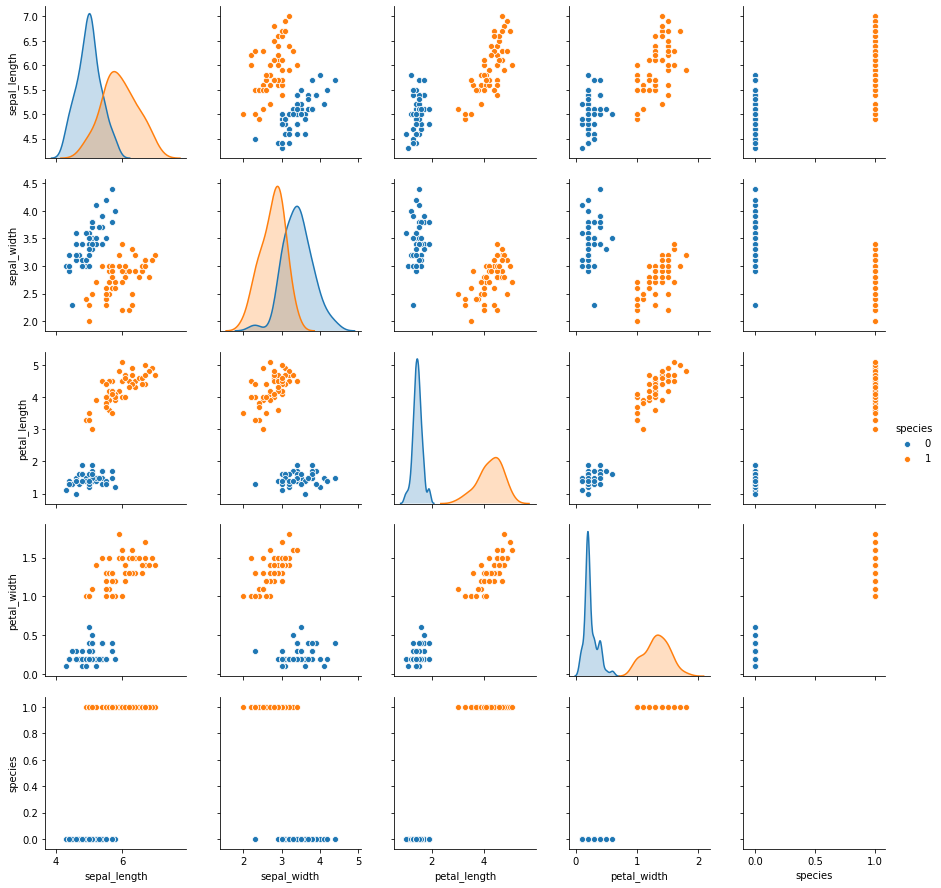

In [24]:
sns.pairplot(data=df,hue='species')

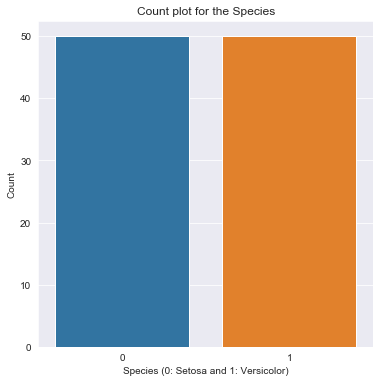

In [25]:
plt.figure(figsize=(6,6))
sns.set_style('darkgrid')
sns.countplot(df['species'])
plt.title('Count plot for the Species')
plt.xlabel('Species (0: Setosa and 1: Versicolor)')
plt.ylabel('Count')
plt.show()

In [26]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

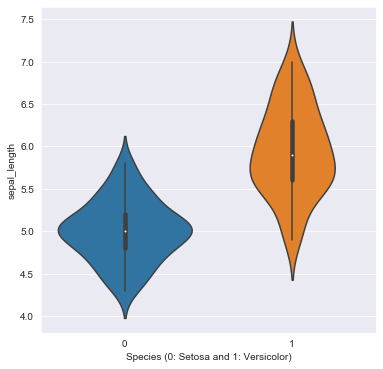

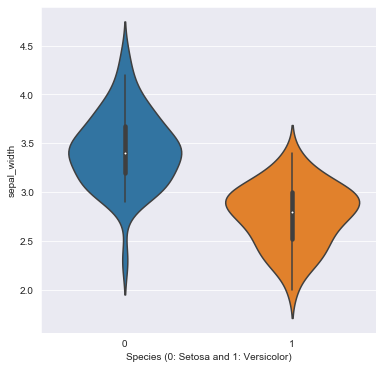

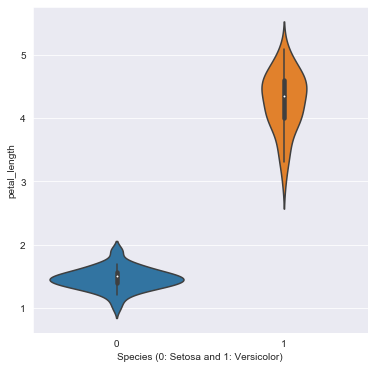

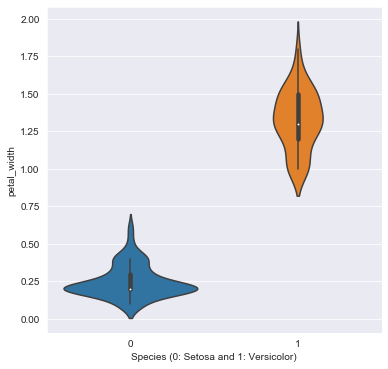

In [27]:
t=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in t:
    plt.figure(figsize=(6,6))
    sns.violinplot(x='species',y=i,data=df)
    plt.xlabel('Species (0: Setosa and 1: Versicolor)')
    plt.ylabel(i)
    plt.show()

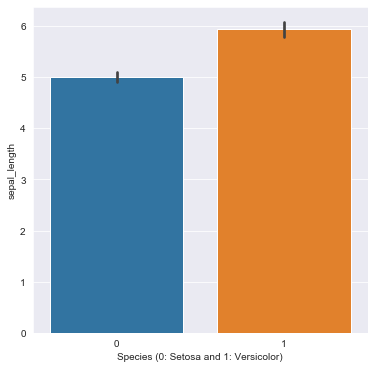

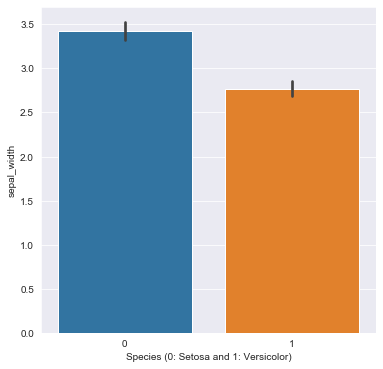

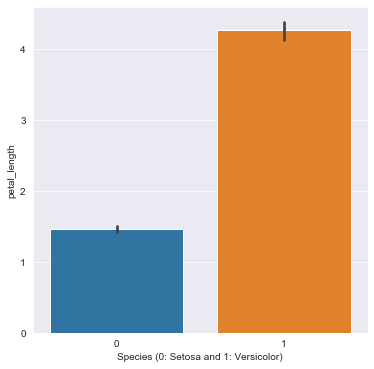

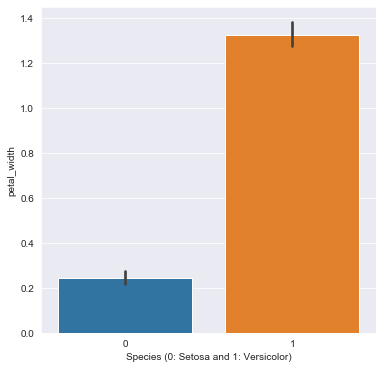

In [28]:
t=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in t:
    plt.figure(figsize=(6,6))
    sns.barplot(x='species',y=i,data=df)
    plt.xlabel('Species (0: Setosa and 1: Versicolor)')
    plt.ylabel(i)
    plt.show()

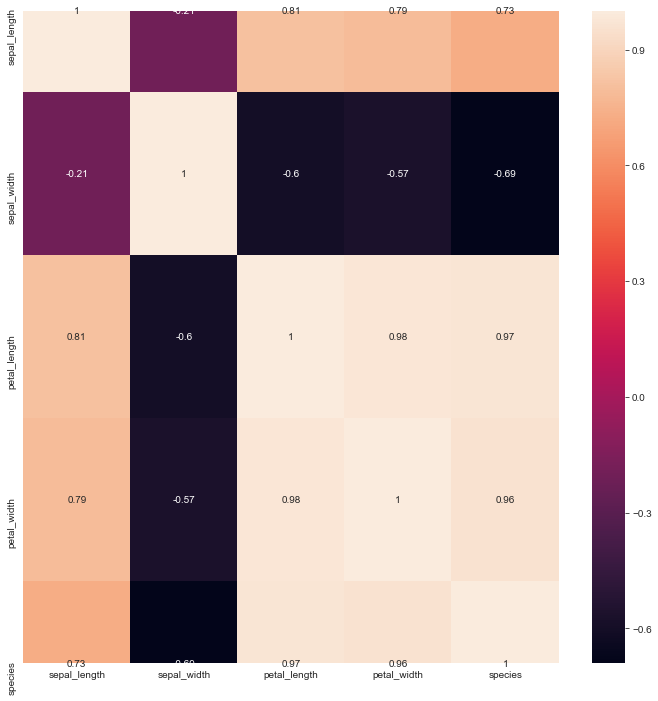

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

#### Name: Sahil Harjai